VERİ KEŞFİ VE TEMEL İSTATİSTİKLER

1-AMAÇ 

Bu çalışmada Amasya iline ait 3 ilçenin elektrik tüketim ve tahsilat verileri incelenmiş, veri kalitesi değerlendirilmiş ve temel istatistikler çıkarılmıştır.

2-KÜTÜPHANELER

In [2]:
import pandas as pd
import numpy as np

In [5]:
import os
print(os.getcwd())

C:\Users\ozden\casestudy


3-VERİ YÜKLEME

In [8]:
file_path = "elektrik_veri_hashed.xlsx"
xls = pd.ExcelFile(file_path)
xls.sheet_names

['Tahsilat', 'Tahsilat 1', 'Tahakkuk', 'Tahakkuk 1', 'Tahakkuk 2']

4-HER SAYFAYI AYRI DATAFRAME’E ALMA

In [13]:
df_tahsilat = pd.read_excel(xls, sheet_name="Tahsilat")
df_tahsilat1 = pd.read_excel(xls, sheet_name="Tahsilat 1")
df_hamamozu = pd.read_excel(xls, sheet_name="Tahakkuk")
df_gumush = pd.read_excel(xls, sheet_name="Tahakkuk 1")
df_goynucek = pd.read_excel(xls, sheet_name="Tahakkuk 2")

5-DATAFRAME BOYUTLARINI KONTROL ETME

In [14]:
print("Tahsilat:", df_tahsilat.shape)
print("Tahsilat 1:", df_tahsilat1.shape)
print("Hamamözü:", df_hamamozu.shape)
print("Gümüşhacıköy:", df_gumush.shape)
print("Göynücek:", df_goynucek.shape)

Tahsilat: (636993, 9)
Tahsilat 1: (917632, 22)
Hamamözü: (124818, 10)
Gümüşhacıköy: (765657, 10)
Göynücek: (295223, 10)


In [16]:
toplam_kayit = sum(kayit_sayilari.values())
toplam_kayit

2740323

Kayıt sayıları case study dokümanıyla uyuşmaktadır ve veri eksik ya da yanlış okunmadığı gözlemlenmiştir.

6-VERİ YAPISINI İNCELEME

In [18]:
df_hamamozu.info()
df_gumush.info()
df_goynucek.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124818 entries, 0 to 124817
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   il                 124818 non-null  object 
 1   ilce               124818 non-null  object 
 2   sozlesme_hesap_no  124818 non-null  int64  
 3   mali_yil_donem     124818 non-null  object 
 4   fatura_tarihi      124818 non-null  object 
 5   kayit_tarihi       124818 non-null  object 
 6   vade_tarihi        124818 non-null  object 
 7   hesap_sinifi       124818 non-null  object 
 8   Hesap Sınıfı       124818 non-null  object 
 9   kwh                124818 non-null  float64
dtypes: float64(1), int64(1), object(8)
memory usage: 9.5+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 765657 entries, 0 to 765656
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   il                 765657

Üç ilçede de hiçbir sütunda eksik (null) veri yok

In [19]:
df_hamamozu.head()

,il,ilce,sozlesme_hesap_no,mali_yil_donem,fatura_tarihi,kayit_tarihi,vade_tarihi,hesap_sinifi,Hesap Sınıfı,kwh
0,AMASYA,HAMAMÖZÜ,917576806,2023-01-01,2023-01-12,2023-03-06,2023-01-23,M001,Mesken,1.79
1,AMASYA,HAMAMÖZÜ,917576806,2023-01-01,2023-02-09,2023-05-11,2023-02-20,M001,Mesken,2.60
2,AMASYA,HAMAMÖZÜ,917576806,2023-02-01,2023-02-09,2023-05-11,2023-02-20,M001,Mesken,1.23
3,AMASYA,HAMAMÖZÜ,917576806,2023-02-01,2023-03-10,2023-05-11,2023-03-20,M001,Mesken,2.56
4,AMASYA,HAMAMÖZÜ,917576806,2023-03-01,2023-03-10,2023-05-11,2023-03-20,M001,Mesken,1.35


In [20]:
df_gumush.head()

,il,ilce,sozlesme_hesap_no,mali_yil_donem,fatura_tarihi,kayit_tarihi,vade_tarihi,hesap_sinifi,Hesap Sınıfı,kwh
0,AMASYA,GÜMÜŞHACIKÖY,7444449517,2023-01-01,2023-01-11,2023-03-06,2023-01-23,M001,Mesken,21.85
1,AMASYA,GÜMÜŞHACIKÖY,7444449517,2023-01-01,2023-02-10,2023-05-11,2023-02-20,M001,Mesken,44.50
2,AMASYA,GÜMÜŞHACIKÖY,7444449517,2023-02-01,2023-02-10,2023-05-11,2023-02-20,M001,Mesken,22.25
3,AMASYA,GÜMÜŞHACIKÖY,7444449517,2023-02-01,2023-03-10,2023-05-11,2023-03-20,M001,Mesken,45.71
4,AMASYA,GÜMÜŞHACIKÖY,7444449517,2023-03-01,2023-03-10,2023-05-11,2023-03-20,M001,Mesken,25.40


In [21]:
df_goynucek.head()

,il,ilce,sozlesme_hesap_no,mali_yil_donem,fatura_tarihi,kayit_tarihi,vade_tarihi,hesap_sinifi,Hesap Sınıfı,kwh
0,AMASYA,GÖYNÜCEK,9374624783,2023-01-01,2023-01-14,2023-03-06,2023-01-24,M001,Mesken,0.10
1,AMASYA,GÖYNÜCEK,9374624783,2023-01-01,2025-03-12,2025-05-09,2025-03-24,M001,Mesken,0.12
2,AMASYA,GÖYNÜCEK,9374624783,2023-02-01,2025-03-12,2025-05-09,2025-03-24,M001,Mesken,0.20
3,AMASYA,GÖYNÜCEK,9374624783,2023-03-01,2025-03-12,2025-05-09,2025-03-24,M001,Mesken,0.00
4,AMASYA,GÖYNÜCEK,9374624783,2023-04-01,2025-03-12,2025-05-09,2025-03-24,M001,Mesken,0.08


Kolon isimleri, mantıksız değer,h esap sınıfı doğruluğu kontrol edilmiştir.

In [ ]:
8-TANIMLAYICI İSTATİSTİKLER

Hamamözü

In [24]:
df_hamamozu["kwh"].describe()

count    124818.000000
mean         70.874619
std         389.217875
min       -1242.990000
25%          15.490000
50%          40.560000
75%          70.430000
max       25941.600000
Name: kwh, dtype: float64

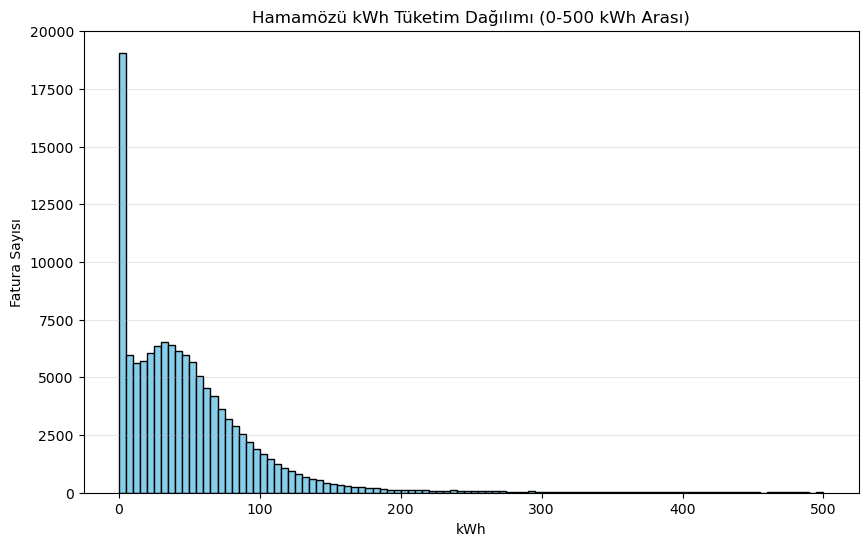

In [38]:
plt.figure(figsize=(10, 6))
plt.hist(df_hamamozu['kwh'], bins=100, range=(0, 500), color='skyblue', edgecolor='black')
plt.title('Hamamözü kWh Tüketim Dağılımı (0-500 kWh Arası)')
plt.xlabel('kWh')
plt.ylabel('Fatura Sayısı')
plt.grid(axis='y', alpha=0.3)
plt.show()

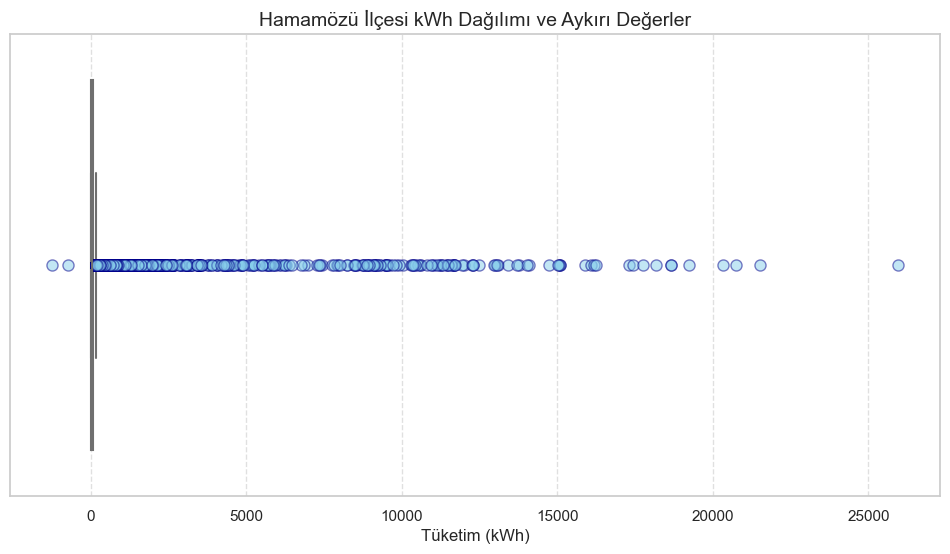

In [76]:
plt.figure(figsize=(12, 6))
flier_style = dict(markerfacecolor='skyblue', marker='o', markersize=8,
                  markeredgecolor='darkblue', alpha=0.5)
sns.boxplot(x=df_hamamozu['kwh'], 
            color='skyblue',        
            flierprops=flier_style) 

plt.title('Hamamözü İlçesi kWh Dağılımı ve Aykırı Değerler', fontsize=14)
plt.xlabel('Tüketim (kWh)', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

Ortalama (Mean) değerin 70.87 kWh, medyan (Median) değerin ise 40.56 kWh olmasınedeniyle Mean > Median koşulu sağlanmaktadır; bu durum tüketim dağılımının sağa çarpık (right-skewed) bir yapıya sahip olduğunu göstermektedir.

Gümüşhacıköy

In [45]:
df_gumush["kwh"].describe()

count    765657.000000
mean         97.336632
std        1077.758336
min      -25370.640000
25%          18.570000
50%          48.310000
75%          82.720000
max      153575.730000
Name: kwh, dtype: float64

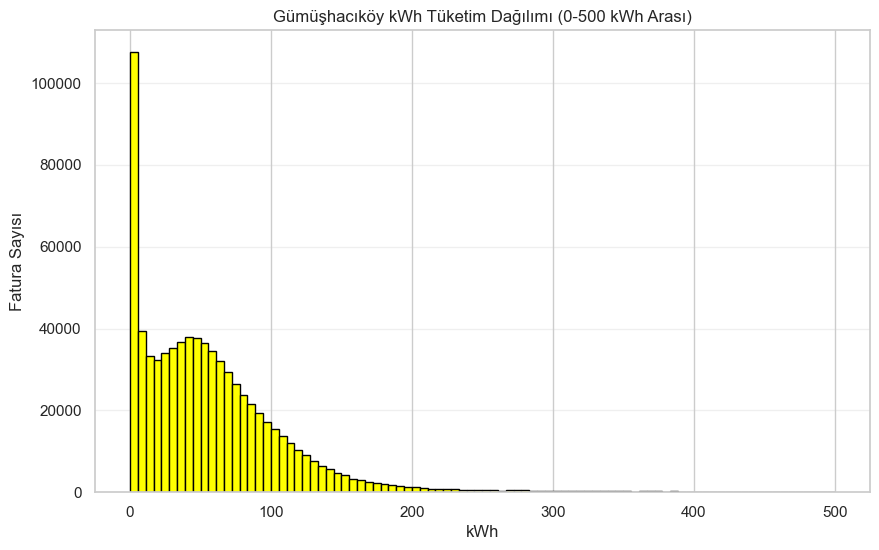

In [49]:
plt.figure(figsize=(10, 6))
plt.hist(df_gumush['kwh'], bins=90, range=(0, 500), color='yellow', edgecolor='black')
plt.title('Gümüşhacıköy kWh Tüketim Dağılımı (0-500 kWh Arası)')
plt.xlabel('kWh')
plt.ylabel('Fatura Sayısı')
plt.grid(axis='y', alpha=0.3)
plt.show()

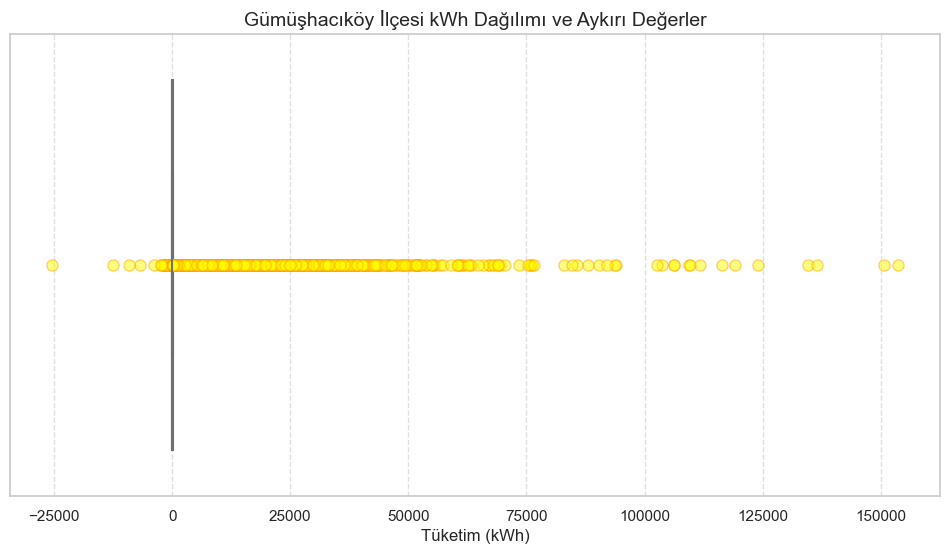

In [53]:
import seaborn as sns

plt.figure(figsize=(12, 6))
flier_style = dict(markerfacecolor='yellow', marker='o', markersize=8,
                  markeredgecolor='orange', alpha=0.5)
sns.boxplot(x=df_gumush['kwh'], 
            color='skyblue',        
            flierprops=flier_style) 

plt.title('Gümüşhacıköy İlçesi kWh Dağılımı ve Aykırı Değerler', fontsize=14)
plt.xlabel('Tüketim (kWh)', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

Mean (97.34) değerinin Median (48.31) değerinden büyük olması, tüketim 
dağılımının sağa çarpık (right-skewed) olduğunu göstermektedir



Göynücek

In [54]:
df_goynucek["kwh"].describe()

count    295223.000000
mean         89.669891
std         742.276369
min       -4208.640000
25%          17.860000
50%          45.090000
75%          77.140000
max      105687.690000
Name: kwh, dtype: float64

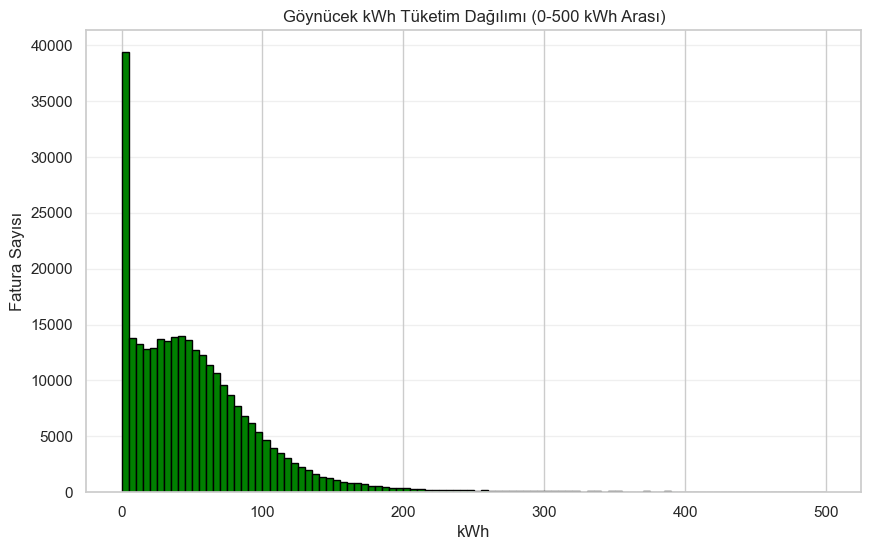

In [55]:
plt.figure(figsize=(10, 6))
plt.hist(df_goynucek['kwh'], bins=100, range=(0, 500), color='green', edgecolor='black')
plt.title('Göynücek kWh Tüketim Dağılımı (0-500 kWh Arası)')
plt.xlabel('kWh')
plt.ylabel('Fatura Sayısı')
plt.grid(axis='y', alpha=0.3)
plt.show()

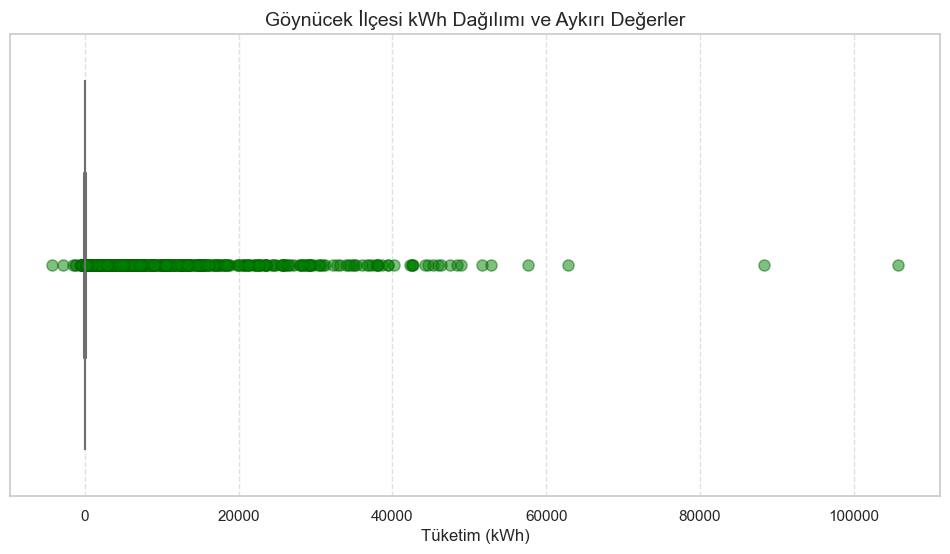

In [56]:
plt.figure(figsize=(12, 6))
flier_style = dict(markerfacecolor='green', marker='o', markersize=8,
                  markeredgecolor='darkgreen', alpha=0.5)
sns.boxplot(x=df_goynucek['kwh'], 
            color='skyblue',        
            flierprops=flier_style) 

plt.title('Göynücek İlçesi kWh Dağılımı ve Aykırı Değerler', fontsize=14)
plt.xlabel('Tüketim (kWh)', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

Ortalama (Mean) değerin 89.67 kWh, medyan (Median) değerin ise 45.09 kWh olması nedeniyle Mean > Median koşulu sağlanmaktadır; bu durum elektrik tüketimi
dağılımının sağa çarpık (right-skewed) bir yapıya sahip olduğunu göstermektedir.


In [ ]:
9- HER İLÇE İÇİN BENZERSİZ MÜŞTERİ SAYISI

In [57]:
ham_musteri = df_hamamozu["sozlesme_hesap_no"].nunique()
gum_musteri = df_gumush["sozlesme_hesap_no"].nunique()
goy_musteri = df_goynucek["sozlesme_hesap_no"].nunique()

pd.DataFrame({
    "İlçe": ["Hamamözü", "Gümüşhacıköy", "Göynücek"],
    "Benzersiz Müşteri Sayısı": [ham_musteri, gum_musteri, goy_musteri]
})

,İlçe,Benzersiz Müşteri Sayısı
0,Hamamözü,2981
1,Gümüşhacıköy,18190
2,Göynücek,7128


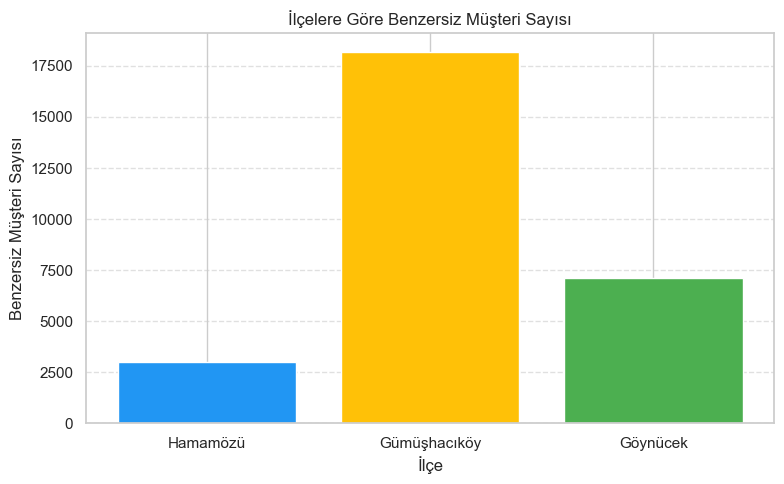

In [60]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.bar(tablo["İlçe"], tablo["Benzersiz Müşteri Sayısı"], color=["#2196F3", "#FFC107", "#4CAF50"])

plt.title("İlçelere Göre Benzersiz Müşteri Sayısı")
plt.xlabel("İlçe")
plt.ylabel("Benzersiz Müşteri Sayısı")

plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show() 

Gümüşhacıköy, benzersiz müşteri sayısı açısından açık ara liderdir.Göynücek, orta düzeyde bir müşteri yoğunluğuna sahiptir.
Hamamözü, en düşük benzersiz müşteri sayısına sahip ilçedir

10-TÜM TAHAKKUK VERİLERİNİ BİRLEŞTİRME

In [ ]:
İlçe bağımsız, Amasya geneli analiz yapabilmek için birleştirmw yapılmıştır.

In [61]:
df_all = pd.concat(
    [df_hamamozu, df_gumush, df_goynucek],
    ignore_index=True
)

df_all.shape

(1185698, 10)

In [63]:
df_all["kwh"].isna().sum() #Eksik Değerler

0

In [64]:
(df_all["kwh"] < 0).sum() #Negatif Değerler

151

In [65]:
df_all["kwh"].sort_values(ascending=False).head(10) #Aşırı Büyük Değerler outlier

808462    153575.73
808466    150757.74
808470    136527.93
808464    134681.40
808448    124008.57
808458    119221.20
808472    116408.88
808468    111801.06
721105    109546.29
721103    109344.06
Name: kwh, dtype: float64

12- HESAP SINIFINA GÖRE TÜKETİM İSTATİSTİKLERİ

In [68]:
df_all.nlargest(10, "kwh")[["ilce", "Hesap Sınıfı", "kwh"]]

,ilce,Hesap Sınıfı,kwh
808462,GÜMÜŞHACIKÖY,Lisansız Üreticiler,153575.73
808466,GÜMÜŞHACIKÖY,Lisansız Üreticiler,150757.74
808470,GÜMÜŞHACIKÖY,Lisansız Üreticiler,136527.93
808464,GÜMÜŞHACIKÖY,Lisansız Üreticiler,134681.40
808448,GÜMÜŞHACIKÖY,Lisansız Üreticiler,124008.57
808458,GÜMÜŞHACIKÖY,Lisansız Üreticiler,119221.20
808472,GÜMÜŞHACIKÖY,Lisansız Üreticiler,116408.88
808468,GÜMÜŞHACIKÖY,Lisansız Üreticiler,111801.06
721105,GÜMÜŞHACIKÖY,Sanayi,109546.29
721103,GÜMÜŞHACIKÖY,Sanayi,109344.06


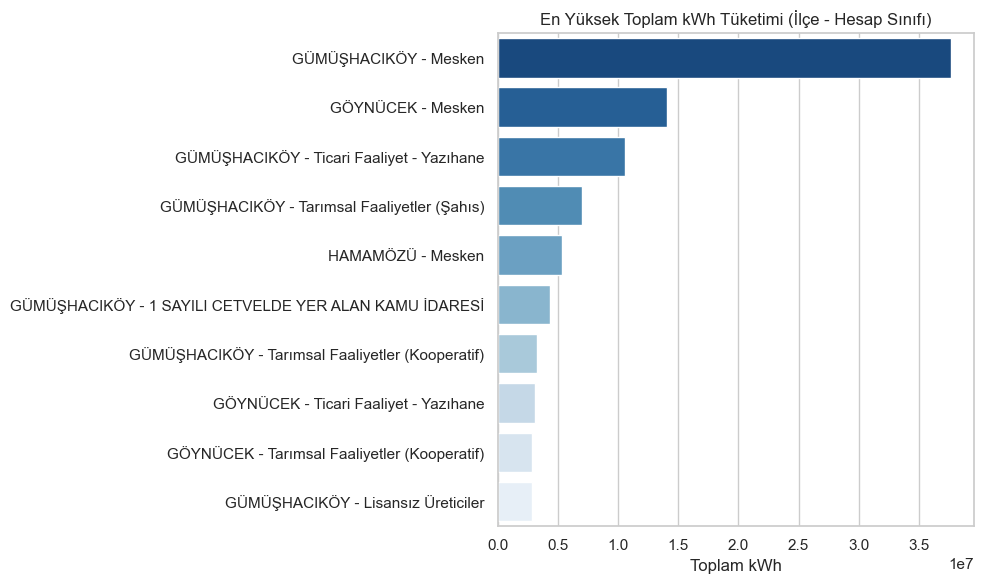

In [71]:
# İlçe + Hesap Sınıfına göre toplam kWh
ozet = (
    df_all
    .groupby(["ilce", "Hesap Sınıfı"], as_index=False)["kwh"]
    .sum()
)

# En yüksek 10 tüketim
top10 = ozet.nlargest(10, "kwh")

plt.figure(figsize=(10, 6))
sns.barplot(
    data=top10,
    x="kwh",
    y=top10["ilce"] + " - " + top10["Hesap Sınıfı"],
    palette="Blues_r"
)

plt.title("En Yüksek Toplam kWh Tüketimi (İlçe - Hesap Sınıfı)")
plt.xlabel("Toplam kWh")
plt.ylabel("")

plt.tight_layout()
plt.show()

Toplam elektrik tüketimini en çok belirleyen unsur: Meskenler ve En yüksek tüketim yoğunluğu: Gümüşhacıköy

In [73]:
df_all["Hesap Sınıfı"].value_counts(normalize=True) * 100

Hesap Sınıfı
Mesken                                      86.582671
Ticari Faaliyet - Yazıhane                   7.699937
Tarımsal Faaliyetler (Şahıs)                 1.456189
İbadethane Isıtma/Soğutma/Lojman             0.857976
1 SAYILI CETVELDE YER ALAN KAMU İDARESİ      0.716877
Şantiye ve Geçici Aboneler                   0.565574
Bina Ort Kul (Asn,Hidr,Kapıcı Dai vb.)       0.295606
İbadethane Aydınlatma                        0.268956
Şehit Aileleri ve Gaziler                    0.225268
Köy İçme Suyu Temini ve Dağıtımı Tesisi      0.207473
Belediye                                     0.176858
Büyükbaş-Küçükbaş Hayvancılık                0.155942
Tarımsal Faaliyetler (Kooperatif)            0.137640
Resmi Daire                                  0.115797
Süt Toplama Merkezi                          0.095134
Cemevleri                                    0.077254
Resmi Daire Lojman                           0.051784
Resmi Üniversite,Yük.Okul,Kurs,Yurt,Okul     0.040145
Resmi SAĞLIK KU

In [72]:
hesap_sinifi_istatistik = df_all.groupby("Hesap Sınıfı")["kwh"].agg(
    ortalama_kwh="mean",
    medyan_kwh="median",
    std_kwh="std",
    kayit_sayisi="count"
).sort_values("ortalama_kwh", ascending=False)

hesap_sinifi_istatistik

,ortalama_kwh,medyan_kwh,std_kwh,kayit_sayisi
Hesap Sınıfı,,,,
Karayolları Genel Müdürlüğü Aydınlatma,30203.431220,36810.900,16963.572539,41
Aritma Tesisleri,16594.174857,16186.910,11656.705924,35
Lisansız Üreticiler,16155.254444,322.320,35926.424902,180
Sanayi,7293.799626,1531.680,13716.343807,187
İçme-Kullanma Suyu (Belediye),5213.509281,400.020,8948.065839,417
Tarımsal Faaliyetler (Kooperatif),3779.290533,282.720,9426.941321,1632
Lisansız Üreticiler - Resmi Daire,1195.051389,770.625,1229.579483,36
"Resmi SAĞLIK KURULUŞLARI,RESMİ SPOR TES.",1154.739118,239.905,3804.865088,442
"Resmi Üniversite,Yük.Okul,Kurs,Yurt,Okul",883.888739,285.410,1435.311536,476


Hesap Sınıfı" bazında gruplandırarak,  aykırı değerlerin (outliers) hangi sektörlerden geldiğini ve enerji tüketimi miktarı belirlendi.Buna göre
Veri setinde Mesken grubu en yüksek abone sayısına sahip olsa da, Karayolları Aydınlatma ve Sanayi gibi sınıflar devasa ortalama tüketim farklarıyla enerji yükünü sırtlamakta ve bu uç değerler verinin sağa çarpık yapısını doğrudan oluşturmaktadır.

13-ÖZET

Veri yapısı tamamen anlaşıldı
İlçeler arası müşteri farkı ortaya kondu
Negatif ve aşırı kWh değerlerinin varlığı tespit edildi
Hesap sınıfı bazlı tüketim profili çıkarıldı